In [100]:
%matplotlib inline
import json
import scipy.signal as sig
import numpy as np
import matplotlib.pyplot as plt

In [6]:
with open("kin_data.json") as dfile:
    data = json.load(dfile)
x = [el['x'] for el in data]
y = [el['y'] for el in data]
z = [el['z'] for el in data]
t = [el['t']-data[0]['t'] for el in data]

In [138]:
def plot_ts_and_freq(times,values,freqs,response):
    plt.plot(times,values)
    plt.xlabel("Time (sec)")
    plt.ylabel("Acceleration ($m/s^{2}$)")
    plt.show()
    
    plt.plot(freqs, 20*np.log10(np.abs(response)), 'b')
    plt.ylabel("Normalized Frequency\nResponse (Db)")
    plt.xlabel("Frequency (Hz)")
#     plt.ylim([-140,0])
    plt.show()

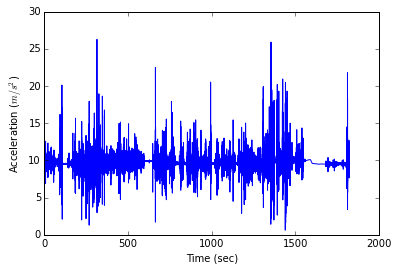

In [99]:
mag = [(x[i]**2+y[i]**2+z[i]**2)**.5 for i in range(len(x))]
plt.plot(t,mag)
plt.xlabel("Time (sec)")
plt.ylabel("Acceleration ($m/s^{2}$)")
plt.show()

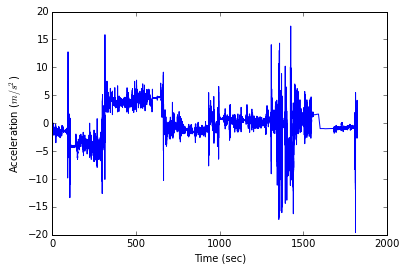

124659


In [44]:
plt.plot(t,x)
plt.xlabel("Time (sec)")
plt.ylabel("Acceleration ($m/s^{2}$)")
plt.show()
print len(x)
samp_freq = 70

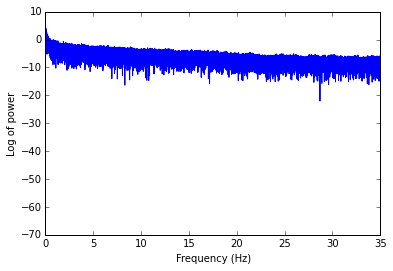

In [107]:
freq,power = sig.periodogram(x,70)
plt.plot(freq,np.log(power))
plt.ylabel("Log of power")
plt.xlabel("Frequency (Hz)")
plt.show()

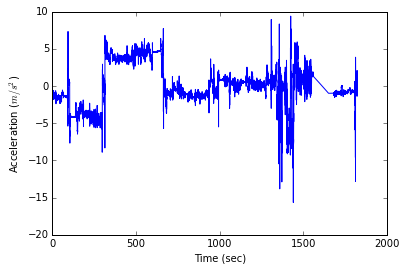

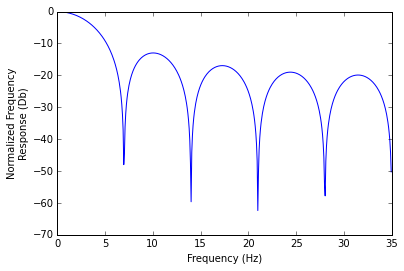

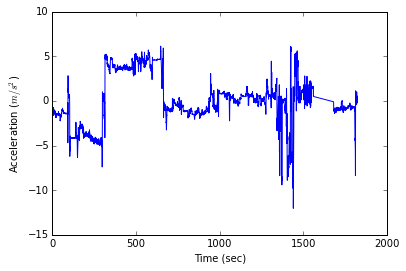

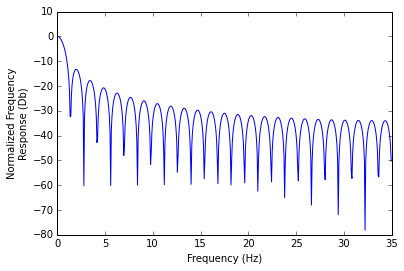

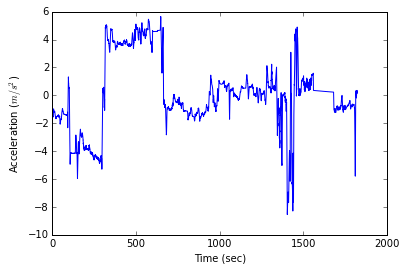

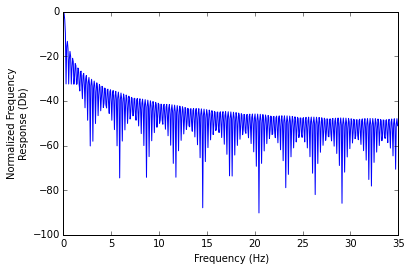

In [81]:
for N in [10,50,250]:
    squarewave = 1/float(N)*np.ones(N)
    x_mean = sig.convolve(x,squarewave,mode='same')
    freqs,response = sig.freqz(squarewave)
    freqs = [val*(samp_freq/2.)/np.pi for val in freqs]
    plot_ts_and_freq(t,x_mean,freqs,response)



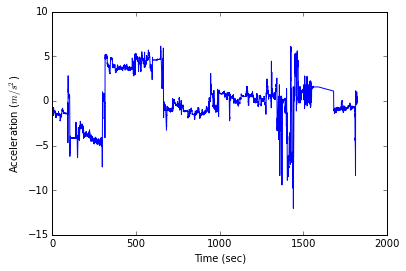

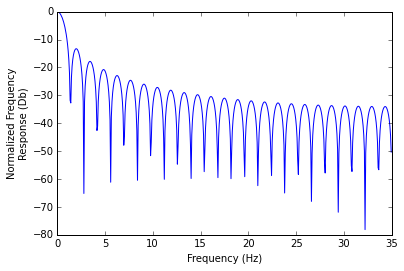

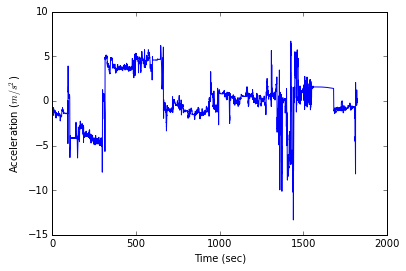

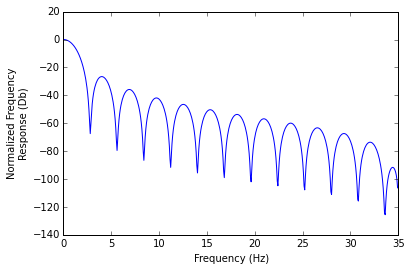

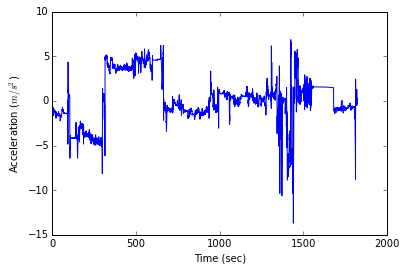

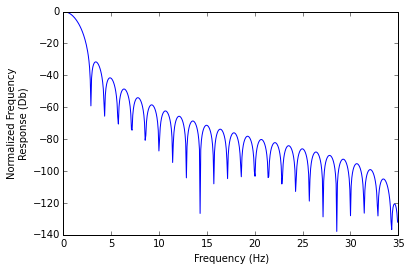

In [139]:
square_window = sig.firwin(50,.1,window='boxcar',nyq=35)
triang_window = sig.firwin(50,.1,window='triang',nyq=35)
han_window = sig.firwin(50,.1,window='hann',nyq=35)
b1 = sig.firwin(40, 0.5)
for window_array in [square_window,triang_window,han_window]:
    filt_data = sig.lfilter(window_array,[1],x)
    freqs,response = sig.freqz(window_array)
    freqs = [val*(samp_freq/2.)/np.pi for val in freqs]
    plot_ts_and_freq(t,filt_data,freqs,response)


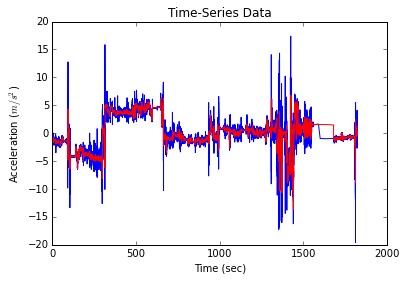

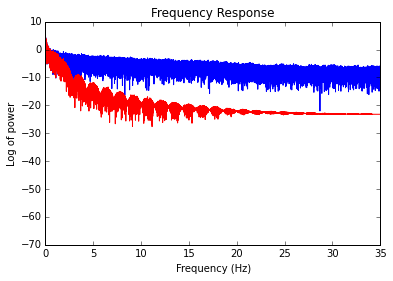

In [110]:
filt_data = sig.lfilter(han_window,[1],x)
plt.title("Time-Series Data")
plt.plot(t,x)
plt.plot(t,filt_data,'-r')
plt.xlabel('Time (sec)')
plt.ylabel("Acceleration ($m/s^{2}$)")
plt.show()

freq,power = sig.periodogram(x,70)
freq,mod_power = sig.periodogram(filt_data,70)
plt.plot(freq,np.log(power))
plt.plot(freq,np.log(mod_power),'-r')
plt.title("Frequency Response")
plt.ylabel("Log of power")
plt.xlabel("Frequency (Hz)")
plt.show()

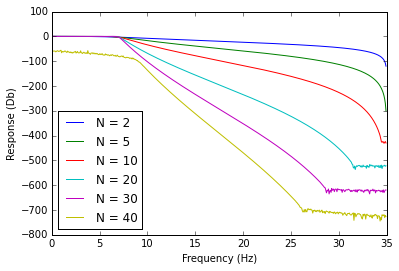

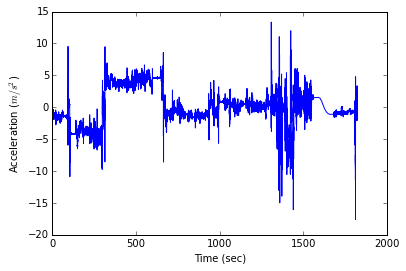

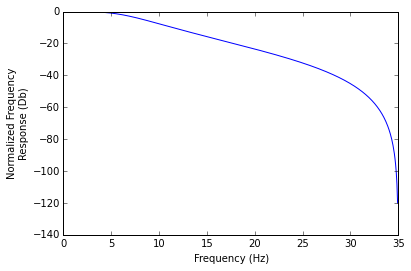

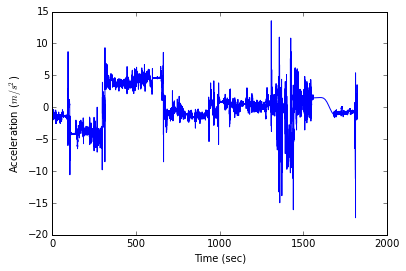

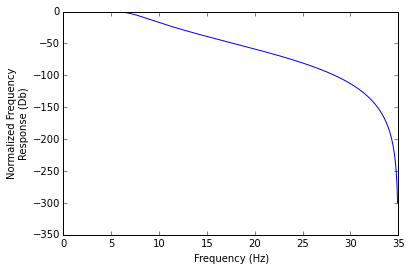

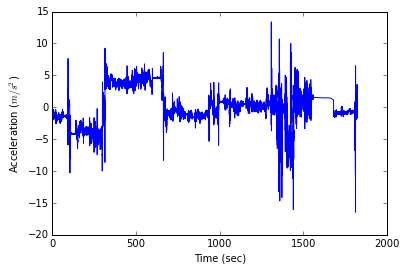

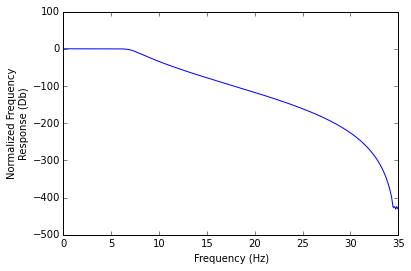

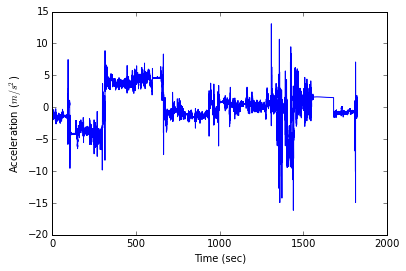

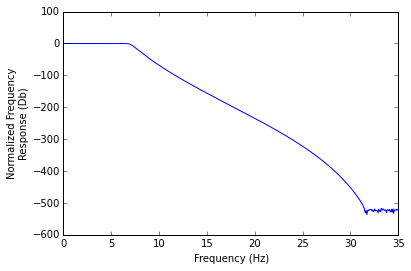

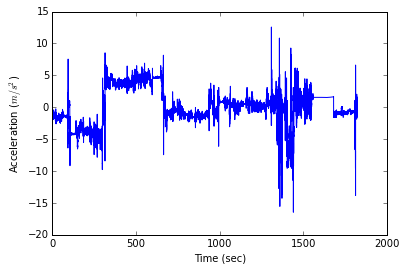

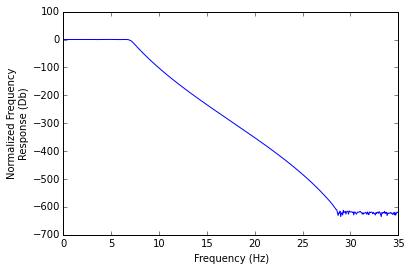

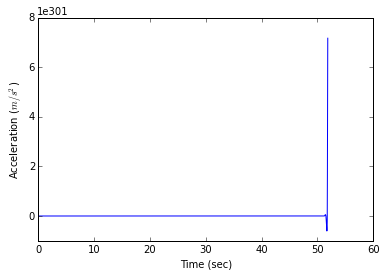

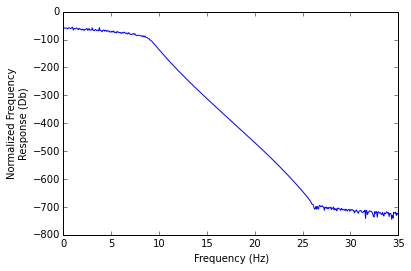

In [152]:
for n in [2,5,10,20,30,40]:
    butter_b,butter_a = sig.iirfilter(n,0.2,ftype='butter',btype='lowpass')
    filt_data = sig.lfilter(butter_b,butter_a,x)
    freqs,response = sig.freqz(butter_b,butter_a)
    freqs = [val*(samp_freq/2.)/np.pi for val in freqs]
#     plot_ts_and_freq(t,filt_data,freqs,response)
    plt.plot(freqs, 20*np.log10(np.abs(response)),label="N = "+str(n))
plt.legend(loc='lower left')
plt.xlabel("Frequency (Hz)")
plt.ylabel("Response (Db)")
plt.show()


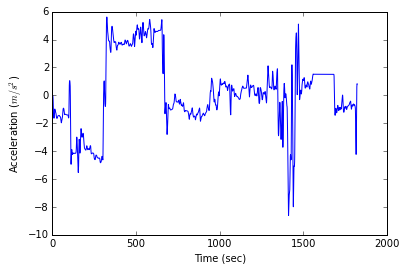

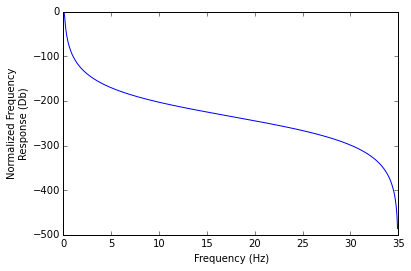

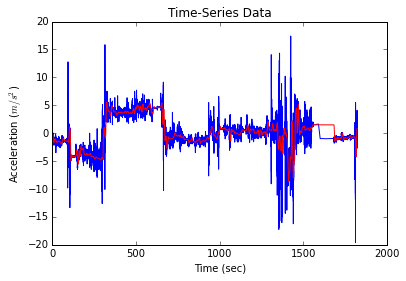

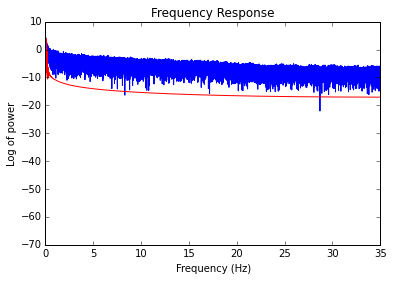

In [155]:
butter_b,butter_a = sig.iirfilter(5,0.002857,ftype='butter',btype='lowpass')
filt_data = sig.lfilter(butter_b,butter_a,x)
freqs,response = sig.freqz(butter_b,butter_a)
freqs = [val*(samp_freq/2.)/np.pi for val in freqs]
plot_ts_and_freq(t,filt_data,freqs,response)

plt.title("Time-Series Data")
plt.plot(t,x)
plt.plot(t,filt_data,'-r')
plt.xlabel('Time (sec)')
plt.ylabel("Acceleration ($m/s^{2}$)")
plt.show()

freq,power = sig.periodogram(x,70)
freq,mod_power = sig.periodogram(filt_data,70)
plt.plot(freq,np.log(power))
plt.plot(freq,np.log(mod_power),'-r')
plt.title("Frequency Response")
plt.ylabel("Log of power")
plt.xlabel("Frequency (Hz)")
plt.show()

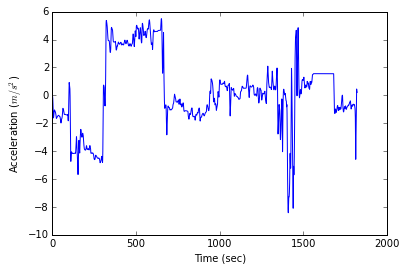

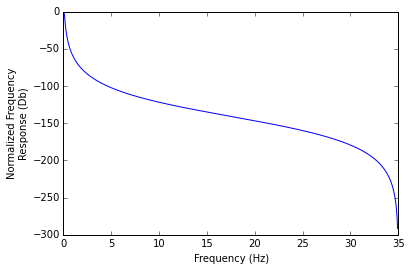

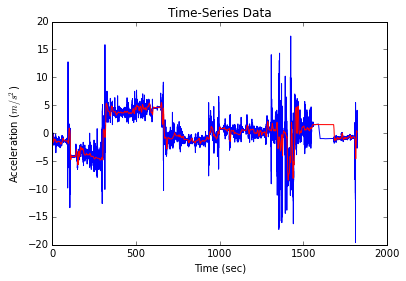

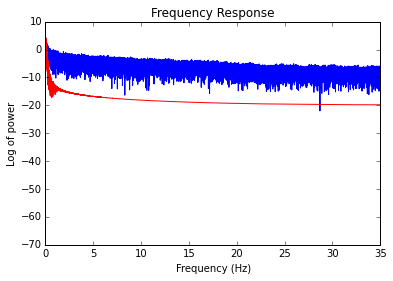

In [160]:
N, Wn = sig.buttord(0.002857, 0.02857, 3, 40)
butter_b,butter_a = sig.butter(N, Wn, 'low')
filt_data = sig.lfilter(butter_b,butter_a,x)
freqs,response = sig.freqz(butter_b,butter_a)
freqs = [val*(samp_freq/2.)/np.pi for val in freqs]
plot_ts_and_freq(t,filt_data,freqs,response)

plt.title("Time-Series Data")
plt.plot(t,x)
plt.plot(t,filt_data,'-r')
plt.xlabel('Time (sec)')
plt.ylabel("Acceleration ($m/s^{2}$)")
plt.show()

freq,power = sig.periodogram(x,70)
freq,mod_power = sig.periodogram(filt_data,70)
plt.plot(freq,np.log(power))
plt.plot(freq,np.log(mod_power),'-r')
plt.title("Frequency Response")
plt.ylabel("Log of power")
plt.xlabel("Frequency (Hz)")
plt.show()

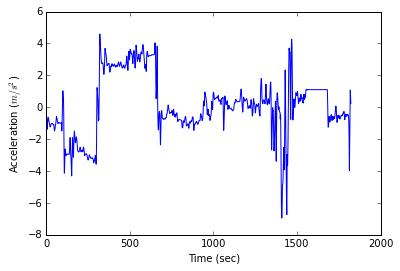

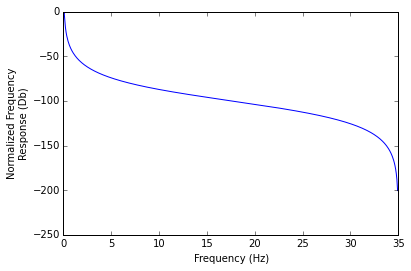

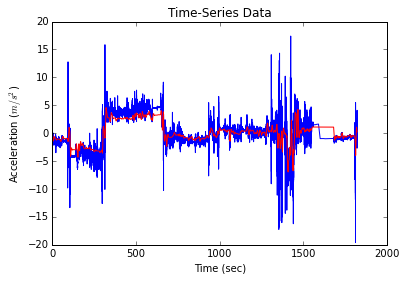

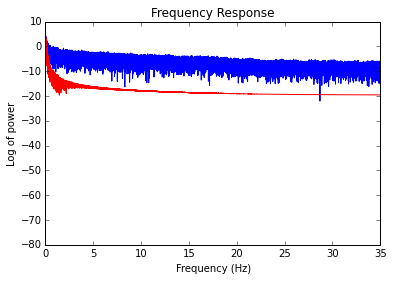

In [163]:
N, Wn = sig.cheb1ord(0.002857, 0.02857, 3, 40)
b, a = sig.cheby1(N, 3, Wn, 'low')
filt_data = sig.lfilter(b,a,x)
freqs,response = sig.freqz(b,a)
freqs = [val*(samp_freq/2.)/np.pi for val in freqs]
plot_ts_and_freq(t,filt_data,freqs,response)

plt.title("Time-Series Data")
plt.plot(t,x)
plt.plot(t,filt_data,'-r')
plt.xlabel('Time (sec)')
plt.ylabel("Acceleration ($m/s^{2}$)")
plt.show()

freq,power = sig.periodogram(x,70)
freq,mod_power = sig.periodogram(filt_data,70)
plt.plot(freq,np.log(power))
plt.plot(freq,np.log(mod_power),'-r')
plt.title("Frequency Response")
plt.ylabel("Log of power")
plt.xlabel("Frequency (Hz)")
plt.show()